<a href="https://colab.research.google.com/github/HoDinhKhanh/AI/blob/main/bai2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 14.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=1f71079487e7794029ca5616a1b601342d69aad496bb748b25f1b03b67860e0c
  Stored in directory: /root/.cache/pip/wheels/2c/04/80/7eefb1a2de7d36aefd06432fab2a1486caf0a0596a7067391a
Successfully built scikit-fuzzy


In [6]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

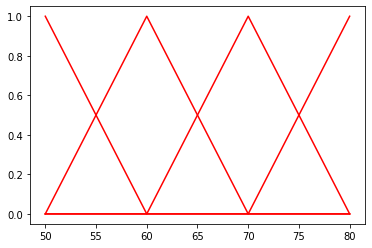

In [24]:
x = np.arange(50, 81, 1)
slow = fuzz.trimf(x, [50,50,60])
plt.figure();
plt.plot(x, slow,'r', linewidth=1.5, label='Slow');
plt.plot;
slow = fuzz.trimf(x, [50,60,70])
plt.plot(x, slow,'r', linewidth=1.5, label='Medium');
plt.plot;
slow = fuzz.trimf(x, [60,70,80])
plt.plot(x, slow,'r', linewidth=1.5, label='Medium fast');
plt.plot;
slow = fuzz.trimf(x, [70,80,80])
plt.plot(x, slow,'r', linewidth=1.5, label='Full speed');
plt.plot;

In [40]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

In [41]:
food = ctrl.Antecedent(np.arange(0,11,1), 'food')
service = ctrl.Antecedent(np.arange(0,11,1), 'service')
tip = ctrl.Consequent(np.arange(10,31,1), 'tip')

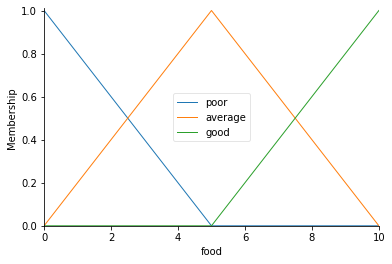

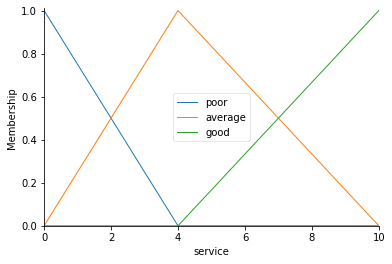

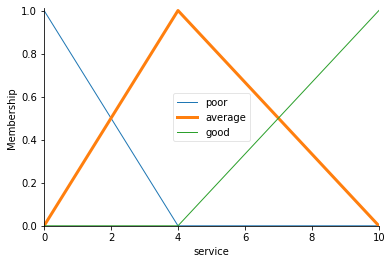

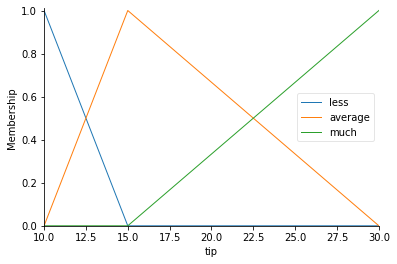

In [48]:
food['poor'] = fuzz.trimf(food.universe, [0,0,5])
food['average'] = fuzz.trimf(food.universe, [0,5,10])
food['good'] = fuzz.trimf(food.universe, [5,10,10])
food.view()
service['poor'] = fuzz.trimf(service.universe, [0,0,4])
service['average'] = fuzz.trimf(service.universe, [0,4,10])
service['good'] = fuzz.trimf(service.universe, [4,10,10])
service.view()
service['average'].view()
tip['less'] = fuzz.trimf(tip.universe, [10,10,15])
tip['average'] = fuzz.trimf(tip.universe, [10,15,30])
tip['much'] = fuzz.trimf(tip.universe, [15,30,30])
tip.view()

In [49]:
rule1 = ctrl.Rule(food['poor']& service['poor'], tip['less'])
rule2 = ctrl.Rule(food['poor']& service['average'], tip['less'])
rule3 = ctrl.Rule(food['poor']& service['good'], tip['less'])
rule4 = ctrl.Rule(food['average']& service['poor'], tip['less'])
rule5 = ctrl.Rule(food['average']& service['average'], tip['average'])
rule6 = ctrl.Rule(food['average']& service['good'], tip['much'])
rule7 = ctrl.Rule(food['good']& service['poor'], tip['less'])
rule8 = ctrl.Rule(food['good']& service['average'], tip['average'])
rule9 = ctrl.Rule(food['good']& service['good'], tip['much'])

24.348312626663144


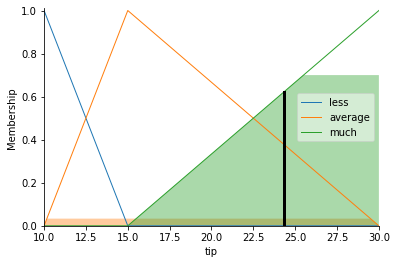

In [50]:
tipping_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9])
tipping = ctrl.ControlSystemSimulation(tipping_ctrl)
tipping.input['food'] = 6.5
tipping.input['service'] = 9.8
tipping.compute()
print(tipping.output['tip'])
tip.view(sim = tipping)

In [71]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

In [72]:
time = ctrl.Antecedent(np.arange(10,301,1), 'time')
rice = ctrl.Antecedent(np.arange(100,2001,1), 'rice')
power = ctrl.Consequent(np.arange(0,101,1), 'power')

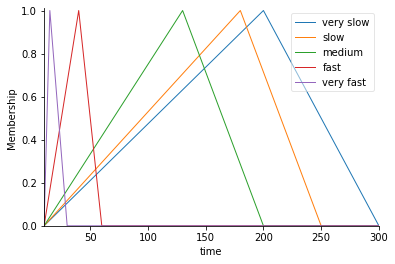

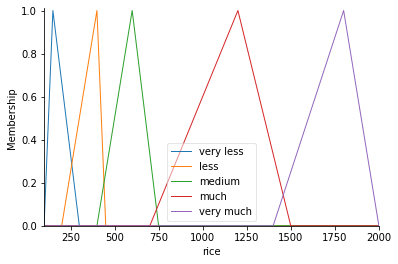

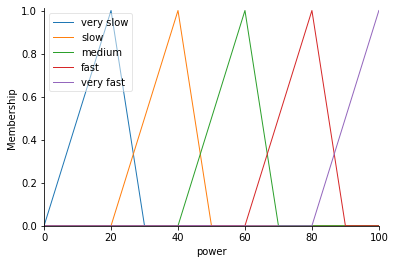

In [73]:
time['very slow'] = fuzz.trimf(time.universe, [10,200,300])
time['slow'] = fuzz.trimf(time.universe, [10,180,250])
time['medium'] = fuzz.trimf(time.universe, [10,130,200])
time['fast'] = fuzz.trimf(time.universe, [10,40,60])
time['very fast'] = fuzz.trimf(time.universe, [10,15,30])
time.view()
rice['very less'] = fuzz.trimf(rice.universe, [100,150,300])
rice['less'] = fuzz.trimf(rice.universe, [200,400,450])
rice['medium'] = fuzz.trimf(rice.universe, [400,600,750])
rice['much'] = fuzz.trimf(rice.universe, [700,1200,1500])
rice['very much'] = fuzz.trimf(rice.universe, [1400,1800,2000])
rice.view()
power['very slow'] = fuzz.trimf(power.universe, [0,20,30])
power['slow'] = fuzz.trimf(power.universe, [20,40,50])
power['medium'] = fuzz.trimf(power.universe, [40,60,70])
power['fast'] = fuzz.trimf(power.universe, [60,80,90])
power['very fast'] = fuzz.trimf(power.universe, [80,100,100])
power.view()

In [75]:
rule1 = ctrl.Rule(rice['very less']& time['very slow'], power['very slow'])
rule2 = ctrl.Rule(rice['very less']& time['slow'], power['slow'])
rule3 = ctrl.Rule(rice['very less']& time['medium'], power['medium'])
rule4 = ctrl.Rule(rice['very less']& time['fast'], power['fast'])
rule5 = ctrl.Rule(rice['very less']& time['very fast'], power['very fast'])
rule6 = ctrl.Rule(rice['less']& time['very slow'], power['very slow'])
rule7 = ctrl.Rule(rice['less']& time['slow'], power['slow'])
rule8 = ctrl.Rule(rice['less']& time['medium'], power['slow'])
rule9 = ctrl.Rule(rice['less']& time['fast'], power['medium'])
rule10 = ctrl.Rule(rice['less']& time['very fast'], power['medium'])
rule11 = ctrl.Rule(rice['medium']& time['very slow'], power['very slow'])
rule12 = ctrl.Rule(rice['medium']& time['slow'], power['medium'])
rule13 = ctrl.Rule(rice['medium']& time['medium'], power['medium'])
rule14 = ctrl.Rule(rice['medium']& time['fast'], power['medium'])
rule15 = ctrl.Rule(rice['medium']& time['very fast'], power['fast'])
rule16 = ctrl.Rule(rice['much']& time['very slow'], power['medium'])
rule17 = ctrl.Rule(rice['much']& time['slow'], power['medium'])
rule18 = ctrl.Rule(rice['much']& time['medium'], power['fast'])
rule19 = ctrl.Rule(rice['much']& time['fast'], power['fast'])
rule20 = ctrl.Rule(rice['much']& time['very fast'], power['very fast'])
rule21 = ctrl.Rule(rice['very much']& time['very slow'], power['medium'])
rule22 = ctrl.Rule(rice['very much']& time['slow'], power['medium'])
rule23 = ctrl.Rule(rice['very much']& time['medium'], power['fast'])
rule24 = ctrl.Rule(rice['very much']& time['fast'], power['very fast'])
rule25 = ctrl.Rule(rice['very much']& time['very fast'], power['very fast'])

36.45357516970612


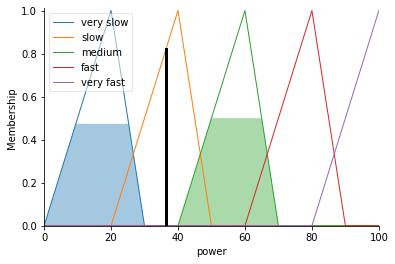

In [92]:
power_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12,rule13,rule14,rule15,rule16,rule17,rule18,rule19,rule20,rule21,rule22,rule23,rule24,rule25])
powering= ctrl.ControlSystemSimulation(power_ctrl)
powering.input['rice']=500
powering.input['time']=100
powering.compute()
print(powering.output['power'])
power.view(sim=powering)